# Sports Betting Using Handicapper Data

Submitted by:
* Ji Zheng
* Ye (Kevin) Pang
* Jay Zuniga

Date: April 18, 2018

Web data scrapped from https://www.sportschatexperts.com/index/cappers/

## Contents <a name='top' />

* <a href='#background'>Background</a>
* <a href='#data'>Data Preparation</a>
* <a href='#eda'>Exploratory Analysis</a>
* <a href='#knn'>k-Nearest Neighbors (kNN)</a>
* <a href='#nb'>Naive Bayes (NB)</a>
* <a href='#lr'>Logistic Regression (LR)</a>
* <a href='#rf'>Random Forest (RF)</a>
* <a href='#gbm'>Gradient Boosting Machine (GBM)</a>
* <a href='#svm'>Support Vector Machines (SVM)</a>
* <a href='#kmeans'>K-means Clustering</a>
* <a href='#gmm'>Gaussian Mixture Model (GMM)</a>
* <a href='#ensemble'>Multilayer Perceptron</a>
* <a href='#results'>Ensemble</a>
* <a href='#appendix_a'>Appendix A</a>
* <a href='#appendix_b'>Appendix B</a>

Time permitting, we wanted to explore classifiers that we covered in the course. These are:

**Supervised**:    
- k Nearest Neighbors
- Naive Bayes
- Logistic Regression
- Random Forest
- Gradient Boosting Machines
- Support Vector Machines

**Unsupervised**:
- K-means
- Gaussian Mixture Model

**Deep learning**:
- Multilayer perceptron

## Background <a name='background' />

<a href='#top'>[Back to Contents]</a>

Sports Betting has become a very big market in the USA, with the legal side estimated at over 4 Billion USD and the total market estimated at 150 Billion USD. As a response to this market, handicappers have started offering their predictions, usually for a fee. Handicappers offer their predictions on specific games.

Our team aims to use ML to find out the following:
1. Are handicappers' predictions useful?
2. Can models be used to generalize a handicapper's betting pattern based on their historical performance data?
  * If we can do so, then we may not have to pay for their "actual" predictions.
3. Based on handicappers' predictions (either actual or simulated), can we predict the outcome of the game for automated betting?

## Data Preparation <a name='data' />

<a href='#top'>[Back to Contents]</a>

We used web scrapping on a popular handicapper website that houses 30 handicappers with a good coverage over a variety of sports. Then we merged the data and added additional derived performance metrics.

#### Import packages

In [1]:
import requests, bs4, hashlib, collections 
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Web scrapping 
* No need to run this step since we have saved the datasets in pickled files

In [3]:
# # Web scrapping 
# # Try an example on MIT SIMULATOR, https://www.sportschatexperts.com/index/capperhistory/capper_id/68/
# def get_html(url):
#     html = requests.get(url)
#     try:
#         html.raise_for_status()
#     except Exception as exc:
#         print('There was a problem: %s' % exc)
#     html = bs4.BeautifulSoup(html.text, "html5lib")
#     return html

# def get_next_url(html):
#     # find the next button
#     return html.find('a', string='Next')['href']

# def merge_table(url, stop_page=-1, data=[]):
#     cur_page = 0
#     while True:
#         cur_page += 1
#         if cur_page % 50 == 0:
#             print("\tProcess %s ..." % url)
#         html = get_html(url)
#         table = html.find('section', class_='leaderboards diffpadding').div.table
#         table_body = table.find('tbody')       
#         rows = table_body.find_all('tr', class_='leaderboards_row2 fix-border-bottom ph-first-row')
#         for row in rows:
#             cols = row.find_all('td')
#             # make sure the targeted row for extraction has 10 columns
#             if len(cols) == 10:
#                 # only want to keep these columns
#                 keep_columns = [1, 2, 3, 4, 5, 6, 7, 8]
#                 cols = [ele.text.strip() for ele in [cols[i] for i in keep_columns]]
#                 data.append([ele for ele in cols if ele]) # Get rid of empty values
#         url = get_next_url(html)
#         if (url == '#') or cur_page >= stop_page:
#             break
            
# def crawl_history():
#     names = [
#     'Smart',
#     'Bartley',
#     'Aronson',
#     'Burns',
#     'Barone', # not in Ji's original list
#     'Bitler',
#     'Power',
#     'Ross',
#     'Diamond',
#     'Trapp',
#     'Sports',
#     'Eddie',
#     'Schule',
#     'DAmico',
#     'Duffy',
#     'Thomas',
#     'Hunter',
#     'Compeau', # not in Ji's original list
#     'Syndicate',
#     'Lundin',
#     'Simulator',
#     'Wilson',
#     'Monohan',
#     'Vinceletti',
#     'Rickenbach',
#     'Higgs',
#     'Nover',
#     'Brown',
#     'Karpinski',
#     'Rogers'
#     ]

#     links = [
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/44/", 
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/33/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/50/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/67/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/69/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/65/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/62/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/66/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/36/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/29/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/45/", 
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/38/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/52/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/35/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/37/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/53/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/41/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/56/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/58/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/61/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/68/", 
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/30/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/43/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/46/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/57/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/40/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/51/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/42/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/60/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/55/",
#     ]
    
#     handicappers_dict = collections.OrderedDict(zip(names, links))
    
#     for k, v in handicappers_dict.items():
#         data=[]
#         merge_table(v, 9999, data)
#         #print(data)
#         df = pd.DataFrame(data, columns=['League', 'Game', 'Date', 'Play', 'Line Selected', 'Type', 'Score', 'Result'])
#         filename = 'HC' + str(list(handicappers_dict.keys()).index(k)+1)
        
#         # produce a hashed gamekey for the game
#         df["GameKey"] = df[['League', 'Game', 'Date']].apply(lambda x: hashlib.md5(''.join(x).encode('utf-8')).hexdigest(), axis=1)

#         # home team is always on the right?
#         df["Home"] = df["Game"].apply(lambda x: x.split('vs.')[1].strip().upper())

#         # away team is always on the left?
#         df["Away"] = df["Game"].apply(lambda x: x.split('vs.')[0].strip().upper())

#         # strip out type of bet
#         df["Bet"] = df["Line Selected"].apply(lambda x: x.split(':')[0].strip().upper())

#         # strip out which team the bet is on
#         df["On"] = df["Play"].apply(lambda x: x.split('Play on ')[1].strip().upper())

#         # convert game time to datetime format 
#         df["GameTime"] = df["Date"].apply(lambda x: pd.to_datetime(x))

#         # strip out juice
#         df["Juice"] = df["Line Selected"].apply(lambda x: x.split(': ')[1].strip() if ("Money Line" in x) else (x.split(': ')[1].split('/')[0].strip() if ("Total" in x) else x.split(': ')[1].split('/')[1].strip()))

#         # MLWinner: either home or away team for ML bets
#         conditions = [
#         (df['On'] == df['Home']) & (df['Bet'] == 'MONEY LINE') & (df['Result'] == 'Win'), 
#         (df['On'] == df['Away']) & (df['Bet'] == 'MONEY LINE') & (df['Result'] == 'Win'), 
#         (df['On'] == df['Home']) & (df['Bet'] == 'MONEY LINE') & (df['Result'] == 'Loss'), 
#         (df['On'] == df['Away']) & (df['Bet'] == 'MONEY LINE') & (df['Result'] == 'Loss')
#         ]
#         choices = ['Home', 'Away', 'Away', 'Home']
#         df['MLWinner'] = np.select(conditions, choices, default='')

#         # MLBet: either home or away team for ML bets
#         conditions = [
#         (df['On'] == df['Home']) & (df['Bet'] == 'MONEY LINE'), 
#         (df['On'] == df['Away']) & (df['Bet'] == 'MONEY LINE')
#         ]
#         choices = ['Home', 'Away']
#         df['MLBet'] = np.select(conditions, choices, default='')
        
#         columns_to_keep = ['League', 'GameKey', 'GameTime', 
#                    'Home', 'Away',
#                    'Bet', 'On',
#                    'Juice', 'Type', 'Result',
#                    'MLBet', 'MLWinner']
#         #print(df[columns_to_keep].head())
#         df[columns_to_keep].to_pickle(k + '.gz', compression="gzip")       

# crawl_history()

#### Concatenate and load all 30 handicappers' betting histories into one dataframe

In [6]:
# merge hadicappers' history bets into one dataframe
names = [
    'Smart',
    'Bartley',
    'Aronson',
    'Burns',
    'Barone', # not in Ji's original list
    'Bitler',
    'Power',
    'Ross',
    'Diamond',
    'Trapp',
    'Sports',
    'Eddie',
    'Schule',
    'DAmico',
    'Duffy',
    'Thomas',
    'Hunter',
    'Compeau', # not in Ji's original list
    'Syndicate',
    'Lundin',
    'Simulator',
    'Wilson',
    'Monohan',
    'Vinceletti',
    'Rickenbach',
    'Higgs',
    'Nover',
    'Brown',
    'Karpinski',
    'Rogers'
    ]

df = pd.DataFrame()
for i in range(1,31): 
    newdf = pd.read_pickle('/Users/jzuniga/Downloads/HCData/HC' + str(i) + '.gz', compression='gzip')
    
    # if you want the last name of the HC, switch to use names array
    #newdf['Handicapper'] = names[i-1]
    newdf['Handicapper'] = 'HC'+str(i)
    df = df.append(newdf, ignore_index=True)
df_orig = df

#### The following functions derive additonal handicapper attributes from the historical bets

 * number of wins in the past 30 games
 * percentage of wins in the past 30 games; for the 1st game, assume win % is 50%
 * active winning & losing streak counts 
 * number of wins in the past 30 games for specific sport(league)
 * percentage of wins in the past 30 games for specific sport(league); for the 1st game, assume win % is 50%
 * active winning & losing streak counts for specific sport(league)
 * risk appetite from betting 'juice' (odds)
   * if juice more than 120, then betting on 'underdog'
   * if juice less than -140, then betting on 'favorite'
   * consider everything else as betting on 'normal'
 * number of wins in the past 30 games for specific risk appetite
 * percentage of wins in the past 30 games for specific risk appetite

In [4]:
# add column for # of wins in the past 30 games
# add column for % of wins in the past 30 games
# if game is 0, assume win % is 50%
# add column for winning steak
def win_past_30_all_sport(df):
    df=df.sort_values(['Handicapper','GameTime'], ascending=[1,1])
    df=df.reset_index(drop=True)
    win_past_30=[]
    win_past_30_all_sport_percent=[]
    win_tracker=[]
    win_steak=[]
    win=0
    lose=0
    win_steak=[]
    
    pointer=0
    last=df.League.count()
    HC=df['Handicapper'][0]
    while pointer < last:
        if df['Handicapper'][pointer]!=HC:
            HC=df['Handicapper'][pointer]
            win_past_30.append(0)
            win_past_30_all_sport_percent.append(0.5)
            win_steak.append(0)
        elif pointer == 0:
            win_past_30.append(0)
            win_past_30_all_sport_percent.append(0.5)
            win_steak.append(0)
        else: 
            win_past_30.append(sum(win_tracker))
            mean = sum(win_tracker)/len(win_tracker)
            win_past_30_all_sport_percent.append(mean)
            if (win>lose):
                win_steak.append(win)
            else:
                win_steak.append(-lose)

        
        if df['Result'][pointer]=='Win':
            win_tracker.insert(0,1)
            win+=1
            lose=0
        elif df['Result'][pointer]=='Push':
            win_tracker.insert(0,1)
        else:
            win_tracker.insert(0,0)
            win=0
            lose+=1
            
            
        
        if len(win_tracker)>30:
            win_tracker.pop()
        pointer+=1

    df['win_past_30_all_sport']=win_past_30
    df['win_past_30_all_sport_percent']=win_past_30_all_sport_percent
    df['win_steak_all_sport']=win_steak
    return df
    
# add column for # of wins in the past 30 games for specific sport(league)
# add column for % of wins in the past 30 games for specific sport(league)
# if game is 0, assume win % is 50%
# add column for winning steak for specific sport(league) 
def win_past_30_specific_sport(df):
    df=df.sort_values(['Handicapper','League','GameTime'], ascending=[1,1,1])
    df=df.reset_index(drop=True)
    win_past_30=[]
    win_past_30_specific_sport_percent=[]
    win_tracker=[]
    pointer=0
    win_steak=[]
    win=0
    lose=0
    last=df.League.count()
    HC=df['Handicapper'][0]
    League=df['League'][0]
    while pointer < last:
        if (df['Handicapper'][pointer]!=HC) or (df['League'][pointer]!=League):
            HC=df['Handicapper'][pointer]
            League=df['League'][pointer]
            win_tracker=[]
            win_past_30.append(0)
            win_past_30_specific_sport_percent.append(0.5)
            win_steak.append(0)
        elif pointer == 0:
            win_past_30.append(0)
            win_past_30_specific_sport_percent.append(0.5)
            win_steak.append(0)
        else: 
            win_past_30.append(sum(win_tracker))
            mean = sum(win_tracker)/len(win_tracker)
            win_past_30_specific_sport_percent.append(mean)
            if (win>lose):
                win_steak.append(win)
            else:
                win_steak.append(-lose)
            
            
        if df['Result'][pointer]=='Win':
            win_tracker.insert(0,1)
            win+=1
            lose=0
        elif df['Result'][pointer]=='Push':
            win_tracker.insert(0,1)
        else:
            win_tracker.insert(0,0)
            win=0
            lose+=1
            
            
        if len(win_tracker)>30:
            win_tracker.pop()

        pointer+=1
    df['win_past_30_specific_sport']=win_past_30
    df['win_past_30_specific_sport_percent']=win_past_30_specific_sport_percent
    df['win_steak_specific_sport']=win_steak
    return df


## convert juice to risk level
## if juice more than 120, then we are betting on underdog
## if juice less than -140, then we are betting on favorite
## I consider everything else is 'normal'
def bet_risk(df):
    pointer=0
    bet_risk=[]
    last=df.League.count()
    while pointer < last:
        if int(df['Juice'][pointer])>120:
            bet_risk.append('underdog')
        elif int(df['Juice'][pointer])<-140:
            bet_risk.append('favorite')
        else:
            bet_risk.append('normal')
        pointer+=1
    df['bet_risk']=bet_risk
    return df

# add column for # of wins in the past 30 games for specific risk
# add column for % of wins in the past 30 games for specific risk
# if game is 0, assume win % is 50%
# add column for winning steak for specific risk
def win_past_30_specific_risk(df):
    df=df.sort_values(['Handicapper','bet_risk','GameTime'], ascending=[1,1,1])
    df=df.reset_index(drop=True)
    win_past_30=[]
    win_past_30_specific_risk_percent=[]
    win_tracker=[]
    pointer=0
    last=df.League.count()
    HC=df['Handicapper'][0]
    Risk=df['bet_risk'][0]
    while pointer < last:
        if (df['Handicapper'][pointer]!=HC) or (df['bet_risk'][pointer]!=Risk):
            HC=df['Handicapper'][pointer]
            Risk=df['bet_risk'][pointer]
            win_tracker=[]
            win_past_30.append(0)
            win_past_30_specific_risk_percent.append(0.5)
        elif pointer == 0:
            win_past_30.append(0)
            win_past_30_specific_risk_percent.append(0.5)
        else: 
            win_past_30.append(sum(win_tracker))
            mean = sum(win_tracker)/len(win_tracker)
            win_past_30_specific_risk_percent.append(mean)
        if df['Result'][pointer]=='Win':
            win_tracker.insert(0,1)
        else:
            win_tracker.insert(0,0)
        if len(win_tracker)>30:
            win_tracker.pop()

        pointer+=1
    df['win_past_30_specific_risk']=win_past_30
    df['win_past_30_specific_risk_percent']=win_past_30_specific_risk_percent
    return df

df = win_past_30_all_sport(df)
df = win_past_30_specific_sport(df)
df = bet_risk(df)
df = win_past_30_specific_risk(df)

#### Here's our modeling (unpivoted) dataset

In [6]:
print(df.shape)
print(df.columns)

(134880, 22)
Index(['League', 'GameKey', 'GameTime', 'Home', 'Away', 'Bet', 'On', 'Juice',
       'Type', 'Result', 'MLBet', 'MLWinner', 'Handicapper',
       'win_past_30_all_sport', 'win_past_30_all_sport_percent',
       'win_steak_all_sport', 'win_past_30_specific_sport',
       'win_past_30_specific_sport_percent', 'win_steak_specific_sport',
       'bet_risk', 'win_past_30_specific_risk',
       'win_past_30_specific_risk_percent'],
      dtype='object')


#### Here's our pivoted modeling dataset

* we pivoted the dataset so that all 30 handicapper are turned into additional columns
* we excluded CFL league games because only 2017 data exists
* we filtered out ML games since they have the least amount of betting variations compare to "spread" and "total" types of betting
* we took the first bet if the handicapper betted more than once on a game, this happened only 174 times.


In [29]:
# find ML games where handicapper betted more than once
bet2ormore = df[df['Bet']=='MONEY LINE'].groupby(['GameKey', 'Handicapper'])['MLBet'].size().ge(2).to_frame()
print(len(bet2ormore[bet2ormore['MLBet']==True]))

174


In [40]:
p_keys = ['MLBet',
            'win_past_30_all_sport', 
            'win_past_30_all_sport_percent',
            'win_past_30_specific_sport', 
            'win_past_30_specific_sport_percent', 
            'win_steak_all_sport',
            'win_steak_specific_sport',
            'bet_risk', 
            'win_past_30_specific_risk', 
            'win_past_30_specific_risk_percent']

p_values = ['A0',
            'A1', 
            'A2',
            'A3', 
            'A4', 
            'A5',
            'A6',
            'A7', 
            'A8', 
            'A9']

pivots = collections.OrderedDict(zip(p_keys, p_values))

for k, v in pivots.items():
    print('Let {} be {}'.format(k,v))

Let MLBet be A0
Let win_past_30_all_sport be A1
Let win_past_30_all_sport_percent be A2
Let win_past_30_specific_sport be A3
Let win_past_30_specific_sport_percent be A4
Let win_steak_all_sport be A5
Let win_steak_specific_sport be A6
Let bet_risk be A7
Let win_past_30_specific_risk be A8
Let win_past_30_specific_risk_percent be A9


In [71]:
ml_game_info = df[(df['Bet']=='MONEY LINE') & (df['League']!='CFL') & (df['MLWinner'] !='')].pivot_table(values=['GameTime', 'League','Home', 'Away', 'MLWinner'], index=['GameKey'], aggfunc='first')

ml_juice = df[(df['Bet']=='MONEY LINE') & (df['League']!='CFL') & (df['MLWinner'] !='')].pivot_table(values=['Juice'], columns='MLBet', index=['GameKey'], aggfunc='max')

ml_juice.columns = ml_juice.columns.droplevel(0)
ml_juice.columns.name = 'Juice'
ml_juice.columns = ['Juice_Away', 'Juice_Home']

pivoted_ml_bets = ml_game_info.join(ml_juice)

for k, v in pivots.items():
    pv = df[(df['Bet']=='MONEY LINE') & (df['League']!='CFL') & (df['MLWinner'] !='')].pivot_table(values=[k], 
                                                          columns='Handicapper', 
                                                          index=['GameKey'], aggfunc='first')
    pv.columns = pv.columns.droplevel(0)
    pv = pv.add_prefix(v+'_')
    pivoted_ml_bets = pivoted_ml_bets.join(pv)

no_bets = ['A0_HC1', 'A0_HC10', 'A0_HC11', 'A0_HC12', 'A0_HC13', 'A0_HC14', 'A0_HC15', 'A0_HC16', 'A0_HC17', 'A0_HC18', 'A0_HC19', 'A0_HC2', 'A0_HC20', 'A0_HC21', 'A0_HC22', 'A0_HC23', 'A0_HC24', 'A0_HC25', 'A0_HC26', 'A0_HC27', 'A0_HC28', 'A0_HC29', 'A0_HC3', 'A0_HC30', 'A0_HC4', 'A0_HC5', 'A0_HC6', 'A0_HC7', 'A0_HC8', 'A0_HC9']

for each in no_bets:
    pivoted_ml_bets[each].fillna('NoBet', inplace=True)
    
pivoted_ml_bets.fillna(0, inplace=True)
    
print(pivoted_ml_bets.shape)
#print(list(pivoted_ml_bets.columns))

(15576, 307)


## Exploratory Analysis <a name='eda' />

<a href='#top'>[Back to Contents]</a>

We first explored the collected historical data to get an idea what coverage the 30 handicappers provided, i.e. 1) on which sports and 2) what type of predictions 

In [12]:
# Get general characteristics of data set
print("Number of observations: ", df_orig.shape[0])
print("Number of columns: ", df_orig.shape[1])
print("Features available: ", df_orig.columns)

Number of observations:  134880
Number of columns:  13
Features available:  Index(['League', 'GameKey', 'GameTime', 'Home', 'Away', 'Bet', 'On', 'Juice',
       'Type', 'Result', 'MLBet', 'MLWinner', 'Handicapper'],
      dtype='object')


We see we have a fair amount of observations in total with 134,880 from what we were able to scrape with each observation having 13 original features. The names of these features are shown above.

In [7]:
# Get general characteristics of each of the original columns
print("General data characteristics by column")
print(df_orig.describe())

General data characteristics by column
        League                           GameKey             GameTime  \
count   134880                            134880               134880   
unique       7                             38583                18265   
top        MLB  2899b2606b2a35f67a4f5aa20443ba44  2017-11-19 13:00:00   
freq     39376                                36                   82   
first      NaN                               NaN  2013-07-04 19:07:00   
last       NaN                               NaN  2018-04-11 20:00:00   

              Home        Away           Bet      On   Juice     Type  Result  \
count       134880      134880        134880  134880  134880   134880  134880   
unique         442         450             3     441     387        2       3   
top     WASHINGTON  WASHINGTON  POINT SPREAD    OVER    -110  Premium     Win   
freq          3483        3582         66452   14551   28123   126466   68269   
first          NaN         NaN           NaN

We can see the key characteristics of each column: count, unique values, top value, frequency of top value, first and last values. From these columns we can focus on key features that we'll use extensively.

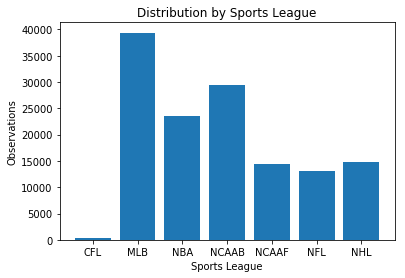

In [8]:
# Distribution according to League
plt.bar(df_orig.sort_values(by='League').League.unique(), df_orig.groupby(['League']).size())
plt.title('Distribution by Sports League')
plt.xlabel('Sports League')
plt.ylabel('Observations')
plt.show()

These shows that predictions on sports are not distributed similarly with MLB (Baseball) having the most predicted with NCAAB (College Basketball) and NBA (Professional Basketball), the two next most numerous.

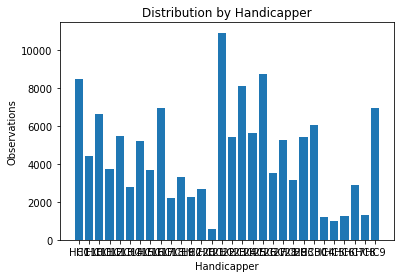

In [10]:
# Distribution by Handicapper
plt.bar(df_orig.sort_values(by='Handicapper').Handicapper.unique(), df_orig.groupby(['Handicapper']).size())
plt.title('Distribution by Handicapper')
plt.xlabel('Handicapper')
plt.ylabel('Observations')
plt.show()

Predictions by handicappers are also not distributed similarly with some handicappers producing more than others. This can be better seen by looking at top handicappers by number of predictions.

In [13]:
# Top Handicapper contributions
h = df_orig.groupby(['Handicapper']).size()
h.sort_values(ascending=False).head()

Handicapper
HC22    10896
HC26     8713
HC1      8437
HC24     8072
HC9      6943
dtype: int64

As we can see HC22 (Wilson), is the most prolific.

We can also look at the juice range.

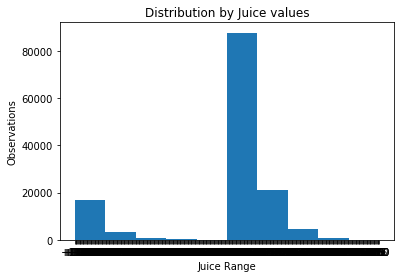

In [11]:
# Distribution by Juice
plt.hist(df_orig['Juice'].dropna().values, bins=10)
plt.xlabel('Juice Range')
plt.ylabel('Observations')
plt.title('Distribution by Juice values')
plt.show()

Some things we learned:
* We have a lot of observations 134,880 with 13 features each
* There is a huge disparity in the predictions by sport - with Baseball, College and Professional Basketball being the top three.
* Handicappers also produce different number of predictions

## K-Nearest Neighbors <a name='knn' />

<a href='#top'>[Back to Contents]</a>

We build a KNN model on handicapper's ML picks and compare to the actual game winners. 

Summary Findings:
1. On unpivoted data, our k=2 got good f1 score on away team winning the games
2. On pivoted data, KNN runs very slowly because of the increase in dimensions. Results are not impressive...

#### On unpivoted data

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

non_clf_ml_bets = df[(df['Bet']=='MONEY LINE') & (df['League']!='CFL') & (df['MLWinner'] !='')]

columns_to_exclude = ['GameKey', 'GameTime', 'Bet', 'On', 
                      'Handicapper', 'Away', 'Home',
                      'Juice', 'Type', 'Result', 'MLWinner', 
                      'win_past_30_all_sport', 'win_past_30_all_sport_percent', 
                      'win_past_30_specific_risk', 'win_past_30_specific_risk_percent', 
                      'win_past_30_specific_sport', 'win_past_30_specific_sport_percent', 
                      'win_steak_all_sport', 'win_steak_specific_sport']

columns_to_use = non_clf_ml_bets.columns.difference(columns_to_exclude)
print('Here are the columns we considered adding to the model:', list(columns_to_use), '\n')

target = ['MLWinner']

make_dummies = ['League', 'MLBet', 'bet_risk']

binarized_non_clf_ml_bets = pd.get_dummies(non_clf_ml_bets, columns=make_dummies)

features = binarized_non_clf_ml_bets.columns.difference(columns_to_exclude)
print('Here are the features the model will use:\n', list(features), '\n')

# Split into train and test data.
train_data = binarized_non_clf_ml_bets[(binarized_non_clf_ml_bets.GameTime < '2017-07-01')][features]
train_labels = non_clf_ml_bets[(non_clf_ml_bets.GameTime < '2017-07-01')][target]

test_data = binarized_non_clf_ml_bets[(binarized_non_clf_ml_bets.GameTime >= '2017-07-01')][features]
test_labels = non_clf_ml_bets[(non_clf_ml_bets.GameTime >= '2017-07-01')][target]

print('Train data:', train_data.shape)
print('Test data:', test_data.shape)

for k in range(1,4):
    print('\nFor K = ', k, '\n')    
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(train_data, train_labels.values.ravel())

    print('train: ', accuracy_score(clf.predict(train_data),train_labels))
    print('test: ', accuracy_score(clf.predict(test_data),test_labels))

    test_predicted_labels = clf.predict(test_data)
    test_predicted_probs = clf.predict_proba(test_data)
    print("\nConfusion matrix:\n%s" % confusion_matrix(test_labels, test_predicted_labels))
    print("\nClassification report for classifier %s:\n%s\n"
    % (clf, classification_report(test_labels, test_predicted_labels))) 

Here are the columns we considered adding to the model: ['League', 'MLBet', 'bet_risk'] 

Here are the features the model will use:
 ['League_MLB', 'League_NBA', 'League_NCAAB', 'League_NCAAF', 'League_NFL', 'League_NHL', 'MLBet_Away', 'MLBet_Home', 'bet_risk_favorite', 'bet_risk_normal', 'bet_risk_underdog'] 

Train data: (32383, 11)
Test data: (8083, 11)

For K =  1 

train:  0.506191520242
test:  0.510701472226

Confusion matrix:
[[2654 1126]
 [2829 1474]]

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

       Away       0.48      0.70      0.57      3780
       Home       0.57      0.34      0.43      4303

avg / total       0.53      0.51      0.50      8083



For K =  2 

train:  0.513016088689
test:  0.511072621551

Confusion matrix:
[[3173  607]
 [3345  958]]

Classificat

#### On pivoted data

In [45]:
print(list(pivoted_ml_bets.columns))

['Away', 'GameTime', 'Home', 'League', 'MLWinner', 'Juice_Away', 'Juice_Home', 'A0_HC1', 'A0_HC10', 'A0_HC11', 'A0_HC12', 'A0_HC13', 'A0_HC14', 'A0_HC15', 'A0_HC16', 'A0_HC17', 'A0_HC18', 'A0_HC19', 'A0_HC2', 'A0_HC20', 'A0_HC21', 'A0_HC22', 'A0_HC23', 'A0_HC24', 'A0_HC25', 'A0_HC26', 'A0_HC27', 'A0_HC28', 'A0_HC29', 'A0_HC3', 'A0_HC30', 'A0_HC4', 'A0_HC5', 'A0_HC6', 'A0_HC7', 'A0_HC8', 'A0_HC9', 'A1_HC1', 'A1_HC10', 'A1_HC11', 'A1_HC12', 'A1_HC13', 'A1_HC14', 'A1_HC15', 'A1_HC16', 'A1_HC17', 'A1_HC18', 'A1_HC19', 'A1_HC2', 'A1_HC20', 'A1_HC21', 'A1_HC22', 'A1_HC23', 'A1_HC24', 'A1_HC25', 'A1_HC26', 'A1_HC27', 'A1_HC28', 'A1_HC29', 'A1_HC3', 'A1_HC30', 'A1_HC4', 'A1_HC5', 'A1_HC6', 'A1_HC7', 'A1_HC8', 'A1_HC9', 'A2_HC1', 'A2_HC10', 'A2_HC11', 'A2_HC12', 'A2_HC13', 'A2_HC14', 'A2_HC15', 'A2_HC16', 'A2_HC17', 'A2_HC18', 'A2_HC19', 'A2_HC2', 'A2_HC20', 'A2_HC21', 'A2_HC22', 'A2_HC23', 'A2_HC24', 'A2_HC25', 'A2_HC26', 'A2_HC27', 'A2_HC28', 'A2_HC29', 'A2_HC3', 'A2_HC30', 'A2_HC4', 'A2_HC5'

In [74]:
columns_to_exclude = ['GameKey', 'GameTime', 
                      'Away', 'Home',
                      'Juice_Away', 'Juice_Home', 'MLWinner']

columns_to_use = pivoted_ml_bets.columns.difference(columns_to_exclude)
print('Here are the columns we considered adding to the model:', list(columns_to_use), '\n')

target = ['MLWinner']

make_dummies = ['League', 
                'A7_HC1', 'A7_HC10', 'A7_HC11', 'A7_HC12', 'A7_HC13', 'A7_HC14', 'A7_HC15', 'A7_HC16', 'A7_HC17', 'A7_HC18', 'A7_HC19', 'A7_HC2', 'A7_HC20', 'A7_HC21', 'A7_HC22', 'A7_HC23', 'A7_HC24', 'A7_HC25', 'A7_HC26', 'A7_HC27', 'A7_HC28', 'A7_HC29', 'A7_HC3', 'A7_HC30', 'A7_HC4', 'A7_HC5', 'A7_HC6', 'A7_HC7', 'A7_HC8', 'A7_HC9',
                'A0_HC1', 'A0_HC10', 'A0_HC11', 'A0_HC12', 'A0_HC13', 'A0_HC14', 'A0_HC15', 'A0_HC16', 'A0_HC17', 'A0_HC18', 'A0_HC19', 'A0_HC2', 'A0_HC20', 'A0_HC21', 'A0_HC22', 'A0_HC23', 'A0_HC24', 'A0_HC25', 'A0_HC26', 'A0_HC27', 'A0_HC28', 'A0_HC29', 'A0_HC3', 'A0_HC30', 'A0_HC4', 'A0_HC5', 'A0_HC6', 'A0_HC7', 'A0_HC8', 'A0_HC9'
               ]

binarized_pivoted_ml_bets = pd.get_dummies(pivoted_ml_bets, columns=make_dummies)

features = binarized_pivoted_ml_bets.columns.difference(columns_to_exclude)
print('Here are the features the model will use:\n', list(features), '\n')

# Split into train and test data.
train_data = binarized_pivoted_ml_bets[(binarized_pivoted_ml_bets.GameTime < '2017-07-01')][features]
train_labels = pivoted_ml_bets[(pivoted_ml_bets.GameTime < '2017-07-01')][target]

test_data = binarized_pivoted_ml_bets[(binarized_pivoted_ml_bets.GameTime >= '2017-07-01')][features]
test_labels = pivoted_ml_bets[(pivoted_ml_bets.GameTime >= '2017-07-01')][target]

print('Train data:', train_data.shape)
print('Test data:', test_data.shape)

for k in range(1,4):
    print('\nFor K = ', k, '\n')    
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(train_data, train_labels.values.ravel())

    print('train: ', accuracy_score(clf.predict(train_data),train_labels))
    print('test: ', accuracy_score(clf.predict(test_data),test_labels))

    test_predicted_labels = clf.predict(test_data)
    test_predicted_probs = clf.predict_proba(test_data)
    print("\nConfusion matrix:\n%s" % confusion_matrix(test_labels, test_predicted_labels))
    print("\nClassification report for classifier %s:\n%s\n"
    % (clf, classification_report(test_labels, test_predicted_labels))) 

Here are the columns we considered adding to the model: ['A0_HC1', 'A0_HC10', 'A0_HC11', 'A0_HC12', 'A0_HC13', 'A0_HC14', 'A0_HC15', 'A0_HC16', 'A0_HC17', 'A0_HC18', 'A0_HC19', 'A0_HC2', 'A0_HC20', 'A0_HC21', 'A0_HC22', 'A0_HC23', 'A0_HC24', 'A0_HC25', 'A0_HC26', 'A0_HC27', 'A0_HC28', 'A0_HC29', 'A0_HC3', 'A0_HC30', 'A0_HC4', 'A0_HC5', 'A0_HC6', 'A0_HC7', 'A0_HC8', 'A0_HC9', 'A1_HC1', 'A1_HC10', 'A1_HC11', 'A1_HC12', 'A1_HC13', 'A1_HC14', 'A1_HC15', 'A1_HC16', 'A1_HC17', 'A1_HC18', 'A1_HC19', 'A1_HC2', 'A1_HC20', 'A1_HC21', 'A1_HC22', 'A1_HC23', 'A1_HC24', 'A1_HC25', 'A1_HC26', 'A1_HC27', 'A1_HC28', 'A1_HC29', 'A1_HC3', 'A1_HC30', 'A1_HC4', 'A1_HC5', 'A1_HC6', 'A1_HC7', 'A1_HC8', 'A1_HC9', 'A2_HC1', 'A2_HC10', 'A2_HC11', 'A2_HC12', 'A2_HC13', 'A2_HC14', 'A2_HC15', 'A2_HC16', 'A2_HC17', 'A2_HC18', 'A2_HC19', 'A2_HC2', 'A2_HC20', 'A2_HC21', 'A2_HC22', 'A2_HC23', 'A2_HC24', 'A2_HC25', 'A2_HC26', 'A2_HC27', 'A2_HC28', 'A2_HC29', 'A2_HC3', 'A2_HC30', 'A2_HC4', 'A2_HC5', 'A2_HC6', 'A2_HC7', 

train:  0.998905052401
test:  0.52688172043

Confusion matrix:
[[643 645]
 [675 827]]

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

       Away       0.49      0.50      0.49      1288
       Home       0.56      0.55      0.56      1502

avg / total       0.53      0.53      0.53      2790



For K =  2 

train:  0.7497262631
test:  0.495698924731

Confusion matrix:
[[ 961  327]
 [1080  422]]

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

       Away       0.47      0.75      0.58      1288
       Home       0.56      0.28      0.37      1502

avg / total       0.52      

## Naive Bayes <a name='nb' />

<a href='#top'>[Back to Contents]</a>

#### On unpivoted data

In [76]:
#from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [77]:
non_clf_ml_bets = df[(df['Bet']=='MONEY LINE') & (df['League']!='CFL') & (df['MLWinner'] !='')]

columns_to_exclude = ['GameKey', 'GameTime', 'Bet', 'On', 
                      'Handicapper', 'Away', 'Home',
                      'Juice', 'Type', 'Result', 'MLWinner']

columns_to_use = non_clf_ml_bets.columns.difference(columns_to_exclude)
print('Here are columns we can use:', columns_to_use)

target = ['MLWinner']


Here are columns we can use: Index(['League', 'MLBet', 'bet_risk', 'win_past_30_all_sport',
       'win_past_30_all_sport_percent', 'win_past_30_specific_risk',
       'win_past_30_specific_risk_percent', 'win_past_30_specific_sport',
       'win_past_30_specific_sport_percent', 'win_steak_all_sport',
       'win_steak_specific_sport'],
      dtype='object')


In [78]:
make_dummies = ['League', 'MLBet', 'bet_risk']

binarized_non_clf_ml_bets = pd.get_dummies(non_clf_ml_bets, columns=make_dummies)

features = binarized_non_clf_ml_bets.columns.difference(columns_to_exclude)
print('Here are the features the model will use:\n', list(features), '\n')

# Split into train and test data.
train_data = binarized_non_clf_ml_bets[(binarized_non_clf_ml_bets.GameTime < '2017-07-01')][features]
train_labels = non_clf_ml_bets[(non_clf_ml_bets.GameTime < '2017-07-01')][target]

test_data = binarized_non_clf_ml_bets[(binarized_non_clf_ml_bets.GameTime >= '2017-07-01')][features]
test_labels = non_clf_ml_bets[(non_clf_ml_bets.GameTime >= '2017-07-01')][target]

print('Train data:', train_data.shape)
print('Test data:', test_data.shape)

Here are the features the model will use:
 ['League_MLB', 'League_NBA', 'League_NCAAB', 'League_NCAAF', 'League_NFL', 'League_NHL', 'MLBet_Away', 'MLBet_Home', 'bet_risk_favorite', 'bet_risk_normal', 'bet_risk_underdog', 'win_past_30_all_sport', 'win_past_30_all_sport_percent', 'win_past_30_specific_risk', 'win_past_30_specific_risk_percent', 'win_past_30_specific_sport', 'win_past_30_specific_sport_percent', 'win_steak_all_sport', 'win_steak_specific_sport'] 

Train data: (32383, 19)
Test data: (8083, 19)


In [81]:
clf=GaussianNB()
clf.fit(train_data,train_labels.values.ravel())

print('train: ', accuracy_score(clf.predict(train_data),train_labels))
print('test: ', accuracy_score(clf.predict(test_data),test_labels))

test_predicted_labels = clf.predict(test_data)
test_predicted_probs = clf.predict_proba(test_data)
print("\nConfusion matrix:\n%s" % confusion_matrix(test_labels, test_predicted_labels))
print("\nClassification report for classifier %s:\n%s\n"
% (clf, classification_report(test_labels, test_predicted_labels))) 

train:  0.527591637588
test:  0.527155759

Confusion matrix:
[[1383 2397]
 [1425 2878]]

Classification report for classifier GaussianNB(priors=None):
             precision    recall  f1-score   support

       Away       0.49      0.37      0.42      3780
       Home       0.55      0.67      0.60      4303

avg / total       0.52      0.53      0.52      8083




#### On pivoted data

In [86]:
columns_to_exclude = ['GameKey', 'GameTime', 
                      'Away', 'Home',
                      'Juice_Away', 'Juice_Home', 'MLWinner']

columns_to_use = pivoted_ml_bets.columns.difference(columns_to_exclude)
print('Here are the columns we considered adding to the model:', list(columns_to_use), '\n')

target = ['MLWinner']

make_dummies = ['League', 
                'A7_HC1', 'A7_HC10', 'A7_HC11', 'A7_HC12', 'A7_HC13', 'A7_HC14', 'A7_HC15', 'A7_HC16', 'A7_HC17', 'A7_HC18', 'A7_HC19', 'A7_HC2', 'A7_HC20', 'A7_HC21', 'A7_HC22', 'A7_HC23', 'A7_HC24', 'A7_HC25', 'A7_HC26', 'A7_HC27', 'A7_HC28', 'A7_HC29', 'A7_HC3', 'A7_HC30', 'A7_HC4', 'A7_HC5', 'A7_HC6', 'A7_HC7', 'A7_HC8', 'A7_HC9',
                'A0_HC1', 'A0_HC10', 'A0_HC11', 'A0_HC12', 'A0_HC13', 'A0_HC14', 'A0_HC15', 'A0_HC16', 'A0_HC17', 'A0_HC18', 'A0_HC19', 'A0_HC2', 'A0_HC20', 'A0_HC21', 'A0_HC22', 'A0_HC23', 'A0_HC24', 'A0_HC25', 'A0_HC26', 'A0_HC27', 'A0_HC28', 'A0_HC29', 'A0_HC3', 'A0_HC30', 'A0_HC4', 'A0_HC5', 'A0_HC6', 'A0_HC7', 'A0_HC8', 'A0_HC9'
               ]

binarized_pivoted_ml_bets = pd.get_dummies(pivoted_ml_bets, columns=make_dummies)

features = binarized_pivoted_ml_bets.columns.difference(columns_to_exclude)
print('Here are the features the model will use:\n', list(features), '\n')

# Split into train and test data.
train_data = binarized_pivoted_ml_bets[(binarized_pivoted_ml_bets.GameTime < '2017-07-01')][features]
train_labels = pivoted_ml_bets[(pivoted_ml_bets.GameTime < '2017-07-01')][target]

test_data = binarized_pivoted_ml_bets[(binarized_pivoted_ml_bets.GameTime >= '2017-07-01')][features]
test_labels = pivoted_ml_bets[(pivoted_ml_bets.GameTime >= '2017-07-01')][target]

print('Train data:', train_data.shape)
print('Test data:', test_data.shape)

Here are the columns we considered adding to the model: ['A0_HC1', 'A0_HC10', 'A0_HC11', 'A0_HC12', 'A0_HC13', 'A0_HC14', 'A0_HC15', 'A0_HC16', 'A0_HC17', 'A0_HC18', 'A0_HC19', 'A0_HC2', 'A0_HC20', 'A0_HC21', 'A0_HC22', 'A0_HC23', 'A0_HC24', 'A0_HC25', 'A0_HC26', 'A0_HC27', 'A0_HC28', 'A0_HC29', 'A0_HC3', 'A0_HC30', 'A0_HC4', 'A0_HC5', 'A0_HC6', 'A0_HC7', 'A0_HC8', 'A0_HC9', 'A1_HC1', 'A1_HC10', 'A1_HC11', 'A1_HC12', 'A1_HC13', 'A1_HC14', 'A1_HC15', 'A1_HC16', 'A1_HC17', 'A1_HC18', 'A1_HC19', 'A1_HC2', 'A1_HC20', 'A1_HC21', 'A1_HC22', 'A1_HC23', 'A1_HC24', 'A1_HC25', 'A1_HC26', 'A1_HC27', 'A1_HC28', 'A1_HC29', 'A1_HC3', 'A1_HC30', 'A1_HC4', 'A1_HC5', 'A1_HC6', 'A1_HC7', 'A1_HC8', 'A1_HC9', 'A2_HC1', 'A2_HC10', 'A2_HC11', 'A2_HC12', 'A2_HC13', 'A2_HC14', 'A2_HC15', 'A2_HC16', 'A2_HC17', 'A2_HC18', 'A2_HC19', 'A2_HC2', 'A2_HC20', 'A2_HC21', 'A2_HC22', 'A2_HC23', 'A2_HC24', 'A2_HC25', 'A2_HC26', 'A2_HC27', 'A2_HC28', 'A2_HC29', 'A2_HC3', 'A2_HC30', 'A2_HC4', 'A2_HC5', 'A2_HC6', 'A2_HC7', 

In [87]:
clf=GaussianNB()
clf.fit(train_data,train_labels.values.ravel())

print('train: ', accuracy_score(clf.predict(train_data),train_labels))
print('test: ', accuracy_score(clf.predict(test_data),test_labels))

test_predicted_labels = clf.predict(test_data)
test_predicted_probs = clf.predict_proba(test_data)
print("\nConfusion matrix:\n%s" % confusion_matrix(test_labels, test_predicted_labels))
print("\nClassification report for classifier %s:\n%s\n"
% (clf, classification_report(test_labels, test_predicted_labels))) 

train:  0.546378851869
test:  0.508960573477

Confusion matrix:
[[660 628]
 [742 760]]

Classification report for classifier GaussianNB(priors=None):
             precision    recall  f1-score   support

       Away       0.47      0.51      0.49      1288
       Home       0.55      0.51      0.53      1502

avg / total       0.51      0.51      0.51      2790




## Logistic Regression <a name='lr' />

<a href='#top'>[Back to Contents]</a>

In [16]:
# code
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Engineer features
dummy_columns = ['League', 'Bet', 'Home', 'Away', 'Type', 'Handicapper']
df_d = pd.get_dummies(df_orig.loc[:, dummy_columns], columns=dummy_columns)

# Create Training Set
train_data = df_d.loc[:94400]
train_labels = df.loc[:94400, 'Result']

# Create Test Set
test_data = df_d.loc[94400:]
test_labels = df.loc[94400:, 'Result']

# Create model 
lr = LogisticRegression()
lr.fit(train_data, train_labels)

# Predict
pred = lr.predict(test_data)

# Measure Accuracy
print('Prediction Accuracy', metrics.accuracy_score(pred, test_labels))

Prediction Accuracy 0.501408102767


#### Summary

Like the other models, Logistic regression has low accuracy and this may be symptomatic of the underlying accuracy of the handicappers, where they handicappers themselves are not significantly distancing themselves from pure chance with respect to picking winners and losers.

We'll look at the results of a few more models before making a generalization.

## Random Forest <a name='rf' />

<a href='#top'>[Back to Contents]</a>

Here are columns we can use: Index(['League', 'bet_risk', 'win_past_30_all_sport',
       'win_past_30_all_sport_percent', 'win_past_30_specific_risk',
       'win_past_30_specific_risk_percent', 'win_past_30_specific_sport',
       'win_past_30_specific_sport_percent', 'win_steak_all_sport',
       'win_steak_specific_sport'],
      dtype='object')
Train data: (32383, 660)
Test data: (8083, 660)


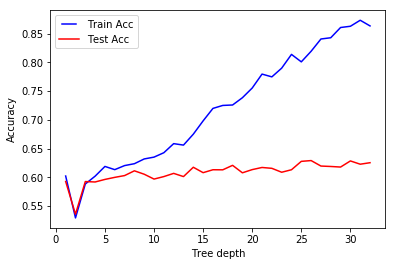

In [17]:
from sklearn.ensemble import RandomForestClassifier

non_clf_ml_bets = df[(df['Bet']=='MONEY LINE') & (df['League']!='CFL') & (df['MLWinner'] !='')]

columns_to_exclude = ['GameKey', 'GameTime', 'Bet', 'On', 
                      'Handicapper', 'Away', 'Home',
                      'Juice', 'Type', 'Result', 'MLWinner']

columns_to_use = non_clf_ml_bets.columns.difference(columns_to_exclude)
print('Here are columns we can use:', columns_to_use)

target = ['MLWinner']

make_dummies = ['League', 'bet_risk', 'MLBet', 'Away', 'Home']

binarized_non_clf_ml_bets = pd.get_dummies(non_clf_ml_bets, columns=make_dummies)

features = binarized_non_clf_ml_bets.columns.difference(columns_to_exclude)
#print('Here are the features the model will use:\n', list(features), '\n')

# Split into train and test data.
train_data = binarized_non_clf_ml_bets[(binarized_non_clf_ml_bets.GameTime < '2017-07-01')][features]
train_labels = binarized_non_clf_ml_bets[(binarized_non_clf_ml_bets.GameTime < '2017-07-01')][target]

test_data = binarized_non_clf_ml_bets[(binarized_non_clf_ml_bets.GameTime >= '2017-07-01')][features]
test_labels = binarized_non_clf_ml_bets[(binarized_non_clf_ml_bets.GameTime >= '2017-07-01')][target]

print('Train data:', train_data.shape)
print('Test data:', test_data.shape)

# let's try to find the optimal depth
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(train_data, train_labels.values.ravel())
    train_pred = rf.predict(train_data)
    train_acc = accuracy_score(rf.predict(train_data),train_labels)
    train_results.append(train_acc)
    y_pred = rf.predict(test_data)
    test_acc = accuracy_score(rf.predict(test_data),test_labels)
    test_results.append(test_acc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train Acc")
line2, = plt.plot(max_depths, test_results, 'r', label="Test Acc")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

In [18]:
# Instantiate model with 30 decision trees
clf = RandomForestClassifier(n_estimators = 30, random_state = 42, max_depth = 4)

# Train the model on training data
clf.fit(train_data, train_labels.values.ravel())

print('train: ', accuracy_score(clf.predict(train_data),train_labels))
print('test: ', accuracy_score(clf.predict(test_data),test_labels))

test_predicted_labels = clf.predict(test_data)
test_predicted_probs = clf.predict_proba(test_data)
print("\nConfusion matrix:\n%s" % confusion_matrix(test_labels, test_predicted_labels))
print("\nClassification report for classifier %s:\n%s\n"
% (clf, classification_report(test_labels, test_predicted_labels))) 

train:  0.610845196554
test:  0.595694667821

Confusion matrix:
[[1282 2542]
 [ 726 3533]]

Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False):
             precision    recall  f1-score   support

       Away       0.64      0.34      0.44      3824
       Home       0.58      0.83      0.68      4259

avg / total       0.61      0.60      0.57      8083




In [ ]:
# summary of findings

## Gradient Boosting Machine <a name='gbm' />

<a href='#top'>[Back to Contents]</a>

In [134]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(train_data, train_labels.values.ravel())

print('train: ', accuracy_score(clf.predict(train_data),train_labels))
print('test: ', accuracy_score(clf.predict(test_data),test_labels))

test_predicted_labels = clf.predict(test_data)
test_predicted_probs = clf.predict_proba(test_data)
print("\nConfusion matrix:\n%s" % confusion_matrix(test_labels, test_predicted_labels))
print("\nClassification report for classifier %s:\n%s\n"
% (clf, classification_report(test_labels, test_predicted_labels))) 

train:  0.577062038724
test:  0.55363107757

Confusion matrix:
[[1629 2151]
 [1457 2846]]

Classification report for classifier GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False):
             precision    recall  f1-score   support

       Away       0.53      0.43      0.47      3780
       Home       0.57      0.66      0.61      4303

avg / total       0.55      0.55      0.55      8083




In [21]:
# summary of findings

## Support Vector Machines <a name='svm' />

<a href='#top'>[Back to Contents]</a>

In [ ]:
# code

In [ ]:
# summary of findings

## K-means Clustering <a name='kmeans' />

<a href='#top'>[Back to Contents]</a>

Text(0.5,1,'K-means clusters over Handicapper data')

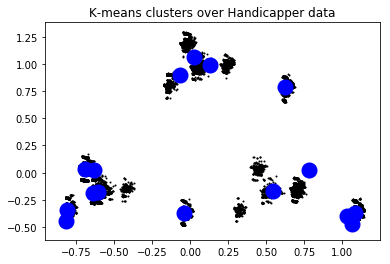

In [17]:
# code
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA

# Engineer features
dummy_columns = ['League', 'Bet', 'Home', 'Away', 'Type', 'Handicapper']
df_d = pd.get_dummies(df_orig.loc[df.Result=='Win', dummy_columns], columns=dummy_columns)

# Reduce columns
pca = PCA(n_components=20)
df_d_pca = pca.fit_transform(df_d)

# Create Training Set
train_data = df_d_pca[:94400]

# Create Test Set
test_data = df_d_pca[94400:]

# Run clusters on correctly predicted data
kmeans = KMeans(init='k-means++', n_clusters=16, n_init=10)
kmeans.fit(train_data)

# Plot the data
plt.plot(train_data[:, 0], train_data[:, 1], 'k.', markersize=2)
    
# Plot the centroids as a blue circles
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=169, linewidths=3,
            color='b', zorder=10)
plt.title('K-means clusters over Handicapper data')


In [23]:
# add contents

## create more bookmarks as needed ...

In [28]:
# code

In [29]:
# add contents